In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
credentials = service_account.Credentials.from_service_account_file('C:/Users/Helen.Tian/Downloads/YETI Google Analytics-45214aca550b.json')# PATH IN YOUR COMPUTER
project_id = 'enduring-hue-184016'   
client = bigquery.Client(credentials= credentials,project=project_id)

In [2]:
#add soft coolers to cart actions
query_job = client.query("SELECT * FROM `enduring-hue-184016.121992452.add_to_cart_actions_soft_coolers` ")
results = query_job.result()
df = results.to_dataframe()

In [3]:
#add soft coolers to cart actions
query_job = client.query("SELECT * FROM `enduring-hue-184016.121992452.not_add_to_cart_actions_I` ")
results = query_job.result()
df1 = results.to_dataframe()

In [4]:
################################################################################################################################
##########################################        add to cart actions       ####################################################
################################################################################################################################

In [5]:
df = df.rename(columns={'A_a_date': 'date', 'A_a_eventAction': 'action','a_a_eventLabel': 'label', 'A_a_visitorId': 'visitorid', 'A_product': 'product' })

In [6]:
df.head()

,date,action,label,visitorid,product
0,2018-02-21,truck fit,filter-8,7887956815014386541,hopper flip 8
1,2018-02-21,truck fit,filter-8,7929123990647199077,hopper flip 8
2,2018-02-21,truck fit,filter-8,5134076990871722997,hopper flip 8
3,2018-02-22,truck fit,filter-8,8036123862352499271,hopper flip 8
4,2018-02-23,truck fit,filter-8,9054695293830572908,hopper flip 8


In [7]:
# numbers of customers (visitors who add products to cart)
len(list(set(df.visitorid))) 

19671

In [8]:
# numbers of "add_to_cart"
cart = df.drop_duplicates(subset=['date','visitorid','product'])

In [9]:
len(cart)

22215

In [10]:
##################################################### photo interaction
photo = df[df.action == 'photo interaction']

In [11]:
photo = photo.groupby(['date','visitorid','product'])['action'].count()

In [12]:
per_p = len(photo)/len(cart)

In [13]:
per_p

0.46563133018230923

In [14]:
p=photo.to_frame().reset_index()

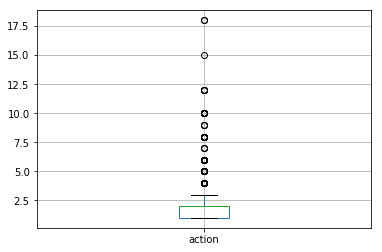

In [15]:
p.boxplot(column = 'action')

In [16]:
a_p=np.mean(p.action)

In [17]:
p.action.describe()

count    10344.000000
mean         1.794954
std          1.027425
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: action, dtype: float64

In [18]:
##################################################### read and write reviews

In [19]:
review = df[df.action == 'read and write reviews']

In [20]:
review = review.groupby(['date','visitorid','product'])['action'].count()

In [21]:
per_r = len(review)/len(cart)

In [22]:
r=review.to_frame().reset_index()

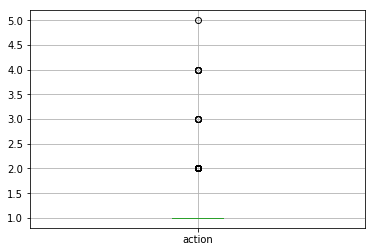

In [23]:
r.boxplot(column = 'action')

In [24]:
a_r=np.mean(r.action)

In [25]:
r.action.describe()

count    921.000000
mean       1.213898
std        0.474184
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: action, dtype: float64

In [26]:
##################################################### product features

In [27]:
feature = df[df.action == 'product features']

In [28]:
feature = feature.groupby(['date','visitorid','product'])['action'].count()

In [29]:
per_f = len(feature)/len(cart)

In [30]:
f=feature.to_frame().reset_index()

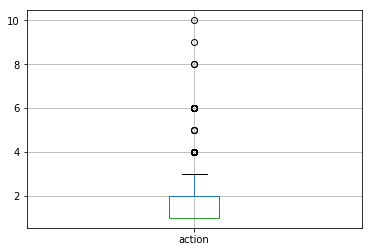

In [31]:
f.boxplot(column = 'action')

In [32]:
a_f=np.mean(f.action)

In [33]:
f.action.describe()

count    4438.000000
mean        1.474538
std         0.802664
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: action, dtype: float64

In [34]:
##################################################### product color view

In [35]:
color = df[df.action == 'product color view']

In [36]:
color = color.groupby(['date','visitorid','product'])['action'].count()

In [37]:
per_c = len(color)/len(cart)

In [38]:
c=color.to_frame().reset_index()

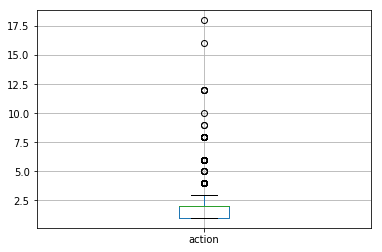

In [39]:
c.boxplot(column = 'action')

In [40]:
a_c=np.mean(c.action)

In [41]:
c.action.describe()

count    14606.000000
mean         1.633096
std          0.812550
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: action, dtype: float64

In [42]:
##################################################### recommendation strand

In [43]:
reco = df[df.action == 'recommendation strand']

In [44]:
reco = reco.groupby(['date','visitorid','product'])['action'].count()

In [45]:
per_re = len(reco)/len(cart)

In [46]:
re=reco.to_frame().reset_index()

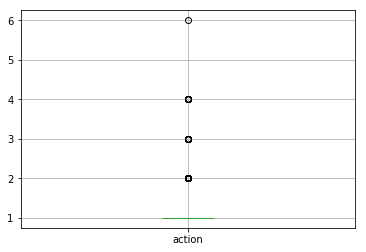

In [47]:
re.boxplot(column = 'action')

In [48]:
a_re=np.mean(re.action)

In [49]:
re.action.describe()

count    1665.000000
mean        1.096096
std         0.372286
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: action, dtype: float64

In [50]:
##################################################### review visible

In [51]:
visi = df[df.action == 'review visible']

In [52]:
visi = visi .groupby(['date','visitorid','product'])['action'].count()

In [53]:
per_v = len(visi)/len(cart)

In [54]:
v=visi.to_frame().reset_index()

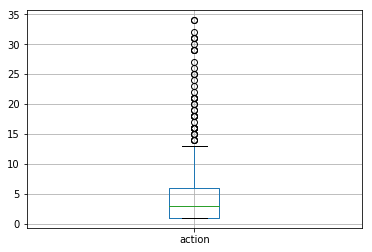

In [55]:
v.boxplot(column = 'action')

In [56]:
a_v=np.mean(v.action)

In [57]:
v.action.describe()

count    568.000000
mean       4.987676
std        5.708824
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       34.000000
Name: action, dtype: float64

In [58]:
##################################################### breadcrumbs

In [59]:
breadcrumbs = df[df.action == 'breadcrumbs']

In [60]:
breadcrumbs = breadcrumbs .groupby(['date','visitorid','product'])['action'].count()

In [139]:
per_b = len(breadcrumbs)/len(cart)

In [140]:
per_b

0.04033310826018456

In [62]:
b=breadcrumbs.to_frame().reset_index()

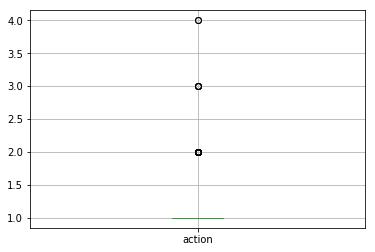

In [63]:
b.boxplot(column = 'action')

In [64]:
a_b=np.mean(b.action)

In [65]:
b.action.describe()

count    597.000000
mean       1.112228
std        0.365181
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: action, dtype: float64

In [66]:
##################################################### truck fit

In [67]:
truck = df[df.action == 'truck fit']

In [68]:
truck = truck.groupby(['date','visitorid','product'])['action'].count()

In [69]:
per_t = len(truck)/len(cart)

In [70]:
t=truck.to_frame().reset_index()

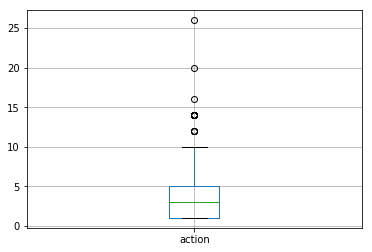

In [71]:
t.boxplot(column = 'action')

In [72]:
a_t=np.mean(t.action)

In [73]:
t.action.describe()

count    1836.000000
mean        3.608932
std         2.449625
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        26.000000
Name: action, dtype: float64

In [74]:
#####plot######

In [75]:
data = [per_p, per_c, per_r, per_f, per_re, per_v, per_b, per_t]

In [76]:
data

[0.46563133018230923,
 0.6574836821967139,
 0.04145847400405132,
 0.19977492685122664,
 0.074949358541526,
 0.025568309700652714,
 0.02687373396353815,
 0.08264686022957461]

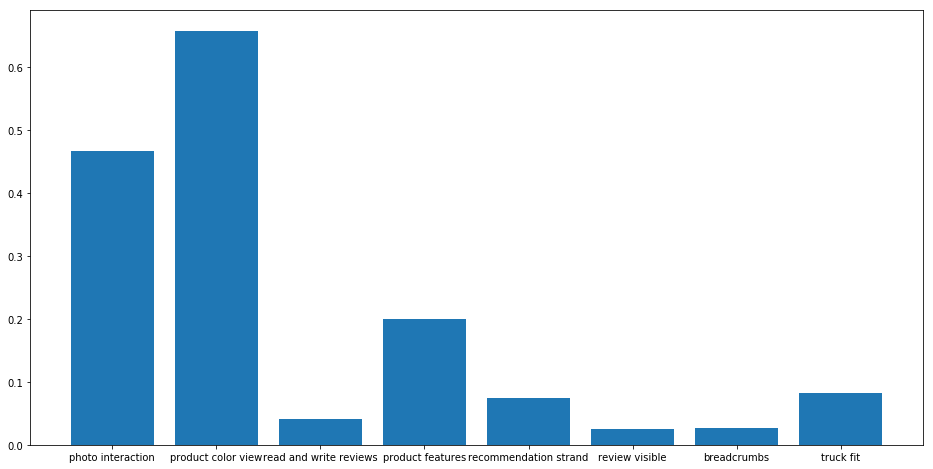

In [77]:
bars = ('photo interaction', 'product color view', 'read and write reviews', 'product features', 'recommendation strand','review visible',  'breadcrumbs', 'truck fit')
plt.figure(figsize=(16,8))
plt.bar(range(len(data)), height = data)
plt.xticks(range(len(data)), bars)
#plt.title("Percentage of ")
plt.show()

In [78]:
################################################################################################################################
##########################################    not  add to cart actions I    ####################################################
################################################################################################################################

In [79]:
df1 = df1.rename(columns={'A_a_date': 'date', 'A_a_eventAction': 'action','a_a_eventLabel': 'label', 'A_a_visitorId': 'visitorid' })

In [80]:
df1.head(20)

,date,action,label,visitorid,search_product,b_date,add_to_cart_product
0,2018-03-11,truck fit,shop this 8,5965930358458633991,hopper two 20,2018-03-11,hopper flip 8
1,2018-03-15,truck fit,shop this 18,213676780529611006,hopper two 20,2018-03-15,hopper flip 8
2,2018-03-18,truck fit,shop this 8,1889002368639206396,hopper two 20,2018-03-18,hopper flip 8
3,2018-03-18,truck fit,shop this 8,7529278349447157450,hopper two 20,2018-03-18,hopper flip 8
4,2018-03-18,truck fit,shop this 20,7529278349447157450,hopper two 20,2018-03-18,hopper flip 8
5,2018-03-20,truck fit,shop this 30,8364273601585525055,hopper two 20,2018-03-20,hopper flip 8
6,2018-03-31,truck fit,shop this 8,8458050450103486516,hopper two 20,2018-03-31,hopper flip 8
7,2018-04-14,truck fit,shop this 8,6363240074864376180,hopper two 20,2018-04-14,hopper flip 8
8,2018-04-22,truck fit,shop this 18,1899685047524752695,hopper two 20,2018-04-22,hopper flip 8
9,2018-04-22,truck fit,shop this 18,1899685047524752695,hopper two 20,2018-04-22,hopper flip 8


In [81]:
# when customer add a soft cooler into cart, how many other similar coolers they will search and compare?

In [82]:
test = df1.drop_duplicates(subset=['date','visitorid','add_to_cart_product','search_product'])

In [83]:
other_product = test.groupby(['date','visitorid','add_to_cart_product'])['search_product'].count().to_frame().reset_index()

In [84]:
other_product.head()

,date,visitorid,add_to_cart_product,search_product
0,2018-01-01,1049436416608205164,hopper two 40,1
1,2018-01-01,125967256252989087,hopper two 30,1
2,2018-01-01,1538692298962036726,hopper flip 18,1
3,2018-01-01,2235871632630161287,hopper flip 18,1
4,2018-01-01,2459663892881937607,hopper two 40,1


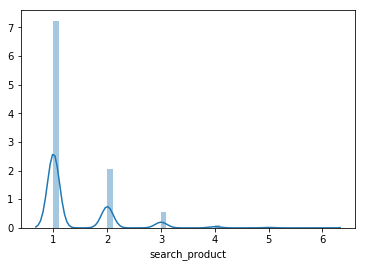

In [85]:
sns.distplot(other_product.search_product)

In [86]:
other_product.search_product.describe()

count    12214.000000
mean         1.367857
std          0.680417
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: search_product, dtype: float64

In [87]:
##################################################### photo interaction
photo = df1[df1.action == 'photo interaction']
photo = photo.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [88]:
p=photo.to_frame().reset_index().add_to_cart_product

In [89]:
p.describe()

count    8401.000000
mean        1.917986
std         1.301487
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        24.000000
Name: add_to_cart_product, dtype: float64

In [90]:
n_p=np.mean(p)

In [91]:
##################################################### read and write reviews

In [92]:
review = df1[df1.action == 'read and write reviews']
review = review.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [93]:
r=review.to_frame().reset_index().add_to_cart_product

In [94]:
r.describe()

count    455.000000
mean       1.402198
std        0.801153
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: add_to_cart_product, dtype: float64

In [95]:
n_r=np.mean(r)

In [96]:
##################################################### product features

In [97]:
feature = df1[df1.action == 'product features']
feature = feature.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [98]:
f=feature.to_frame().reset_index().add_to_cart_product

In [99]:
f.describe()

count    3042.000000
mean        1.523011
std         0.943816
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: add_to_cart_product, dtype: float64

In [100]:
n_f=np.mean(f)

In [101]:
##################################################### product color view

In [102]:
color = df1[df1.action == 'product color view']
color = color.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [103]:
c=color.to_frame().reset_index().add_to_cart_product

In [104]:
c.describe()

count    5887.000000
mean        1.705453
std         1.040078
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        12.000000
Name: add_to_cart_product, dtype: float64

In [105]:
n_c=np.mean(c)

In [106]:
##################################################### recommendation strand

In [107]:
reco = df1[df1.action == 'recommendation strand']
reco = reco.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [108]:
re=reco.to_frame().reset_index().add_to_cart_product

In [109]:
re.describe()

count    682.000000
mean       1.225806
std        0.529907
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: add_to_cart_product, dtype: float64

In [110]:
n_re=np.mean(re)

In [111]:
##################################################### review visible

In [112]:
visi = df1[df1.action == 'review visible']
visi = visi.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [113]:
v=visi.to_frame().reset_index().add_to_cart_product

In [114]:
v.describe()

count    314.000000
mean       5.684713
std        6.973200
min        1.000000
25%        2.000000
50%        4.000000
75%        6.750000
max       48.000000
Name: add_to_cart_product, dtype: float64

In [115]:
n_v=np.mean(v)

In [116]:
##################################################### breadcrumbs

In [117]:
breadcrumbs = df1[df1.action == 'breadcrumbs']
breadcrumbs = breadcrumbs.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [118]:
b=breadcrumbs.to_frame().reset_index().add_to_cart_product

In [119]:
b.describe()

count    896.000000
mean       1.226562
std        0.626249
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: add_to_cart_product, dtype: float64

In [120]:
n_b=np.mean(b)

In [121]:
##################################################### truck fit

In [122]:
truck = df1[df1.action == 'truck fit']
truck = truck.groupby(['date','visitorid','search_product'])['add_to_cart_product'].count()

In [123]:
t=truck.to_frame().reset_index().add_to_cart_product

In [124]:
t.describe()

count    1391.000000
mean        3.902948
std         3.061703
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        28.000000
Name: add_to_cart_product, dtype: float64

In [125]:
n_t=np.mean(t)

In [126]:
times = [n_p,n_r,n_f,n_c,n_re,n_v,n_b,n_t]     #times of actions for not add_to_cart items

In [127]:
times

[1.917985954053089,
 1.402197802197802,
 1.5230111768573307,
 1.7054526923730253,
 1.2258064516129032,
 5.6847133757961785,
 1.2265625,
 3.9029475197699495]

In [128]:
times1 = [a_p,a_r,a_f,a_c,a_re,a_v,a_b,a_t]     #times of actions for add_to_cart items

In [129]:
times1

[1.794953596287703,
 1.213897937024973,
 1.4745380802163137,
 1.6330959879501574,
 1.0960960960960962,
 4.987676056338028,
 1.1122278056951425,
 3.6089324618736383]

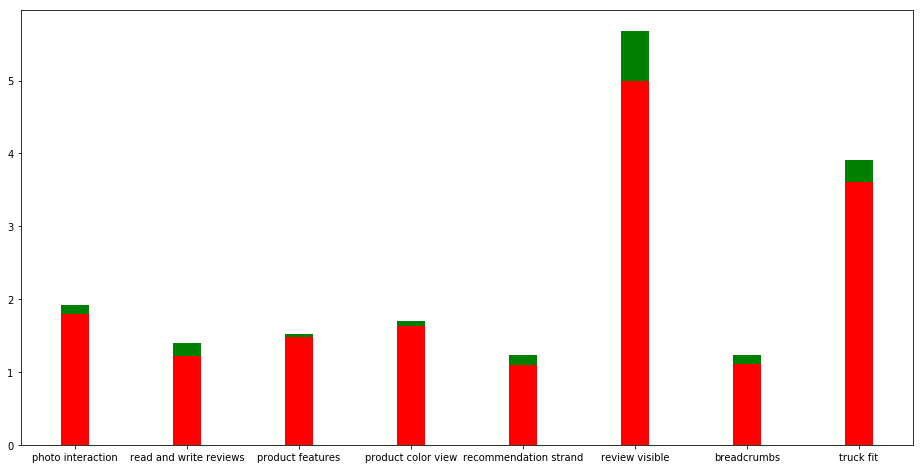

In [130]:
bars = ('photo interaction',  'read and write reviews', 'product features','product color view', 'recommendation strand','review visible',  'breadcrumbs', 'truck fit')
plt.figure(figsize=(16,8))
a=plt.bar(range(len(times)),times, color = 'g', width = 0.25)
b=plt.bar(range(len(times)),times1, color = 'r', width = 0.25)
plt.xticks(range(len(data)), bars)
plt.show()

In [131]:
################################################################################################################################
################################################################################################################################

In [132]:
list(set(df1.add_to_cart_product))

['flip 8 cooler',
 'hopper flip 12',
 'hopper two 20',
 'backflip 24',
 'flip 12 cooler',
 'hopper two 30',
 'hopper two 40',
 'hopper backflip 24',
 'flip 18 cooler',
 'backflip 18',
 'hopper flip 8',
 'hopper flip 18']

In [133]:
df2=df1.drop_duplicates(subset=['date','visitorid','search_product', 'add_to_cart_product'])

In [134]:
df2 = df2.groupby(['add_to_cart_product','search_product'])['date'].count().to_frame(name = 'times').reset_index()

In [135]:
df2.head()

,add_to_cart_product,search_product,times
0,backflip 18,hopper two 30,1
1,backflip 24,hopper flip 12,2
2,backflip 24,hopper flip 18,4
3,backflip 24,hopper flip 8,2
4,backflip 24,hopper two 30,2


In [136]:
df2 = df2.sort_values(['add_to_cart_product','times'], ascending=False).reset_index()

Text(0.5,1,'hopper backflip 24')

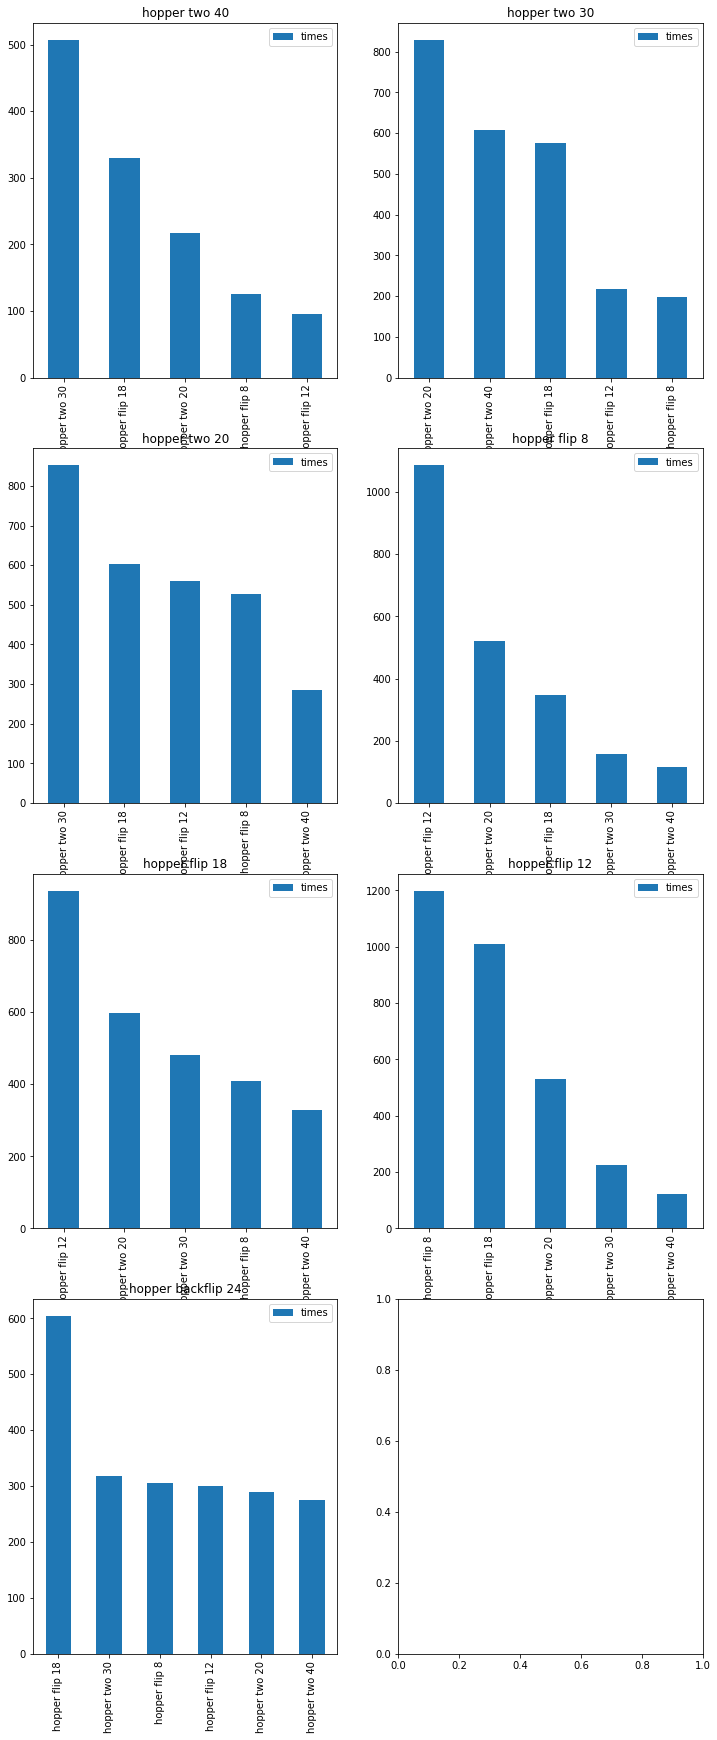

In [143]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,30))
p1 = df2[['search_product', 'times']][:5]
p2 = df2[['search_product', 'times']][5:10]
p3 = df2[['search_product', 'times']][10:15]
p4 = df2[['search_product', 'times']][15:20]
p5 = df2[['search_product', 'times']][20:25]
p6 = df2[['search_product', 'times']][25:30]
p7 = df2[['search_product', 'times']][30:36]

p1.plot(ax=axes[0,0], kind='bar').set_xticklabels(p1.search_product)
p2.plot(ax=axes[0,1], kind='bar').set_xticklabels(p2.search_product)
p3.plot(ax=axes[1,0], kind='bar').set_xticklabels(p3.search_product)
p4.plot(ax=axes[1,1], kind='bar').set_xticklabels(p4.search_product)
p5.plot(ax=axes[2,0], kind='bar').set_xticklabels(p5.search_product)
p6.plot(ax=axes[2,1], kind='bar').set_xticklabels(p6.search_product)
p7.plot(ax=axes[3,0], kind='bar').set_xticklabels(p7.search_product)
axes[0,0].set_title('hopper two 40')
axes[0,1].set_title('hopper two 30')
axes[1,0].set_title('hopper two 20')
axes[1,1].set_title('hopper flip 8')
axes[2,0].set_title('hopper flip 18')
axes[2,1].set_title('hopper flip 12')
axes[3,0].set_title('hopper backflip 24')
